(This algorithm is based on Otsu thresholding method.)

http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html

## Imports


In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

print('imported')

imported


In [126]:
class IntensityThresholding:
    def __init__(self, img_path):
        self.img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
        self.hist = cv.calcHist([self.img], [0], None, [256], [0, 256])
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(self.img, cmap='gray')
        plt.title('Input image')
        plt.subplot(1, 2, 2)
        plt.plot(self.hist)
        plt.title('Histogram')
        plt.show()

    def process(self):
        var_between = np.zeros(256)
        for t in range(1, 256):
            # background
            w_b = self.hist[:t].sum() / self.hist.sum()
            u_b = np.dot(np.arange(t).reshape(1, -1), self.hist[:t]) / np.sum(self.hist[:t])

            # foreground
            w_f = self.hist[t:].sum() / self.hist.sum()
            u_f = np.dot(np.arange(t, len(self.hist)).reshape(1, -1), self.hist[t:]) / np.sum(self.hist[t:])

            var_between[t] = w_b * w_f * (u_b - u_f) ** 2

        self.t = np.argmax(var_between)
        img_thresholded = np.zeros(it.img.shape, dtype=np.uint8)
        img_thresholded[self.img > self.t] = 255

        print('Best threshold: {}'.format(self.t))
        plt.imshow(img_thresholded, cmap='gray')
        return img_thresholded

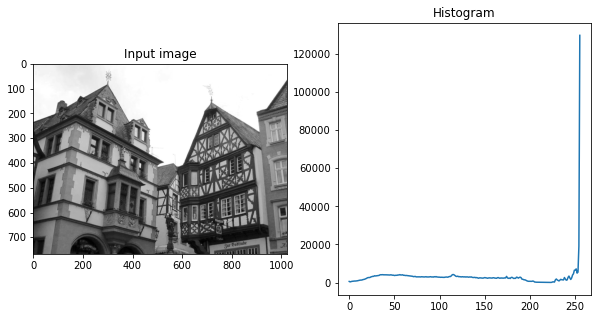

Best threshold: 153


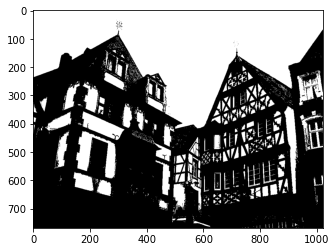

In [128]:
it = IntensityThresholding('./image.jpg')
thresholded_img = it.process()

In [60]:
img = cv.imread('./contour_detection.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)
new_img = np.zeros(img.shape, dtype=np.float32)


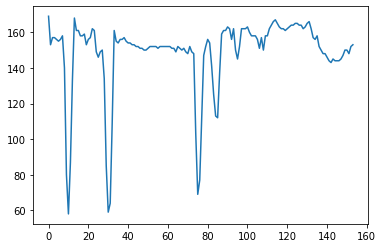

In [61]:
sig = img[0]
plt.plot(sig)

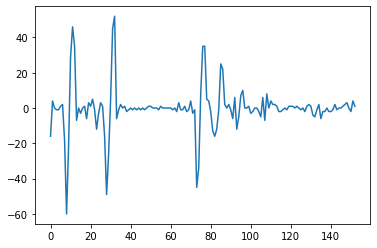

In [63]:
plt.plot(np.diff(sig))

In [75]:
get_diff = lambda x: np.array([x[i + 1] - x[i - 1] for i in range(1, len(x) - 1)])
contour_img = np.array([np.abs(get_diff(sig)) for sig in img])
contour_img_2 = np.array([np.abs(np.diff(sig)) for sig in img])

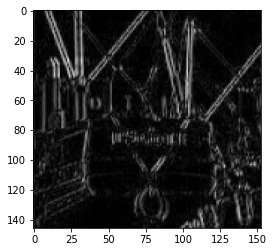

In [77]:
plt.imshow(contour_img_2, cmap='gray')

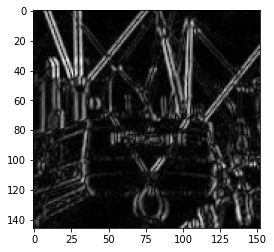

In [78]:
plt.imshow(contour_img, cmap='gray')